<a href="https://colab.research.google.com/github/AbhinavGupta-de/SST_ML/blob/main/Sorting_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda

1. Random Dataset
    - contains two type of fish
    - N datapoints
    - each datapoint will be a 2d vector
    - length and breadth of the fish
2. Write some code for Math
    - norm, distance of vector from plane
3. Brute force to find the best hyperplane(line)
4. plot this


In [19]:
import numpy as np
import pandas as pd
import random

In [20]:
random.seed(32)

## Create a random dataset

In [5]:
TUNA = -1
SALMON = +1
N = 100

In [7]:
def make_random_tuna():
  return random.random() * 3, random.random() * 4

def make_random_salmon():
  return random.random() * 4 + 1, random.random() * 3 + 2


In [11]:
tunas = [make_random_tuna() for _ in range(N//2) ]
salmons = [make_random_salmon() for _ in range(N//2)]


In [12]:

dataset = []
dataset += [(tuna, TUNA) for tuna in tunas]
dataset += [(salmon, SALMON) for salmon in salmons]


In [13]:
print(dataset[:-5])

[((0.20703810469790818, 2.2343809005752973), -1), ((2.715541641727869, 2.9556730239244504), -1), ((1.6719703596814703, 3.2228196114966754), -1), ((1.139544355985068, 0.7072812055211437), -1), ((1.8371849306956005, 0.9774017829493538), -1), ((0.8197250031971051, 3.0753735684352157), -1), ((1.5280328085519437, 0.6985095455661328), -1), ((0.6510742628113936, 2.936211169177643), -1), ((1.9505164698711015, 3.5941151353165965), -1), ((2.216768016095748, 1.139883391460907), -1), ((2.1074711970718343, 3.5268119242180176), -1), ((2.6453436450518546, 3.652590831305424), -1), ((0.4348043333959861, 0.9988640155801694), -1), ((0.5191872814041976, 3.265466421590338), -1), ((2.0794574149183287, 2.231988962561889), -1), ((0.5891734660634764, 1.6458839944087535), -1), ((2.071343739078161, 0.12807495561091953), -1), ((2.6724284112275356, 2.816397013049981), -1), ((2.6828238747670574, 3.7946927703833824), -1), ((1.5462298611313146, 1.2038921880011504), -1), ((1.1391243738919146, 1.9509187334112532), -1),

In [24]:
from matplotlib import pyplot as plt

tuna_x, tuna_y = zip(*tunas)
salmon_x, salmon_y = zip(*salmons)

def plot_model(plane=None):
  plt.scatter(tuna_x, tuna_y, color='blue', label='Tuna')
  plt.scatter(salmon_x, salmon_y, color='red', label='Salmon')
  plt.title("Fish classification")
  plt.xlabel("Length")
  plt.ylabel("Width")

  if plane is not None:
    w,w0 = plane
    w1, w2 = w
    x_values = np.linspace(min(min(tuna_x), min(salmon_x)), max(max(tuna_x), max(salmon_x)), 100)
    y_values = [(-w1/w2) * x - w0/w2 for x in x_values]
    plt.plot(x_values, y_values, color='green', label="Separating Hyperplane (line)")

  plt.legend()
  plt.show

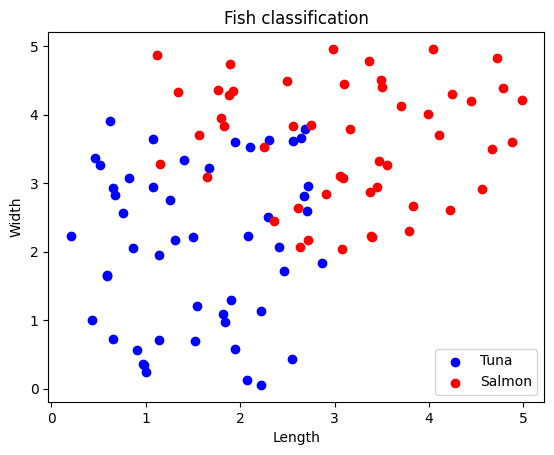

In [25]:
plot_model()

In [26]:
def norm(w):
  return sum(wi ** 2 for wi in w) ** 0.5

def dot(x, w):
  return sum(xi * wi for xi, wi in zip(x, w))

def distance_from_plane(x, plane):
  w, w0 = plane
  return (dot(x, w)+ w0) / norm(w)

def loss(data, plane):
  return sum(distance_from_plane(xi, plane) * yi for xi, yi in data)

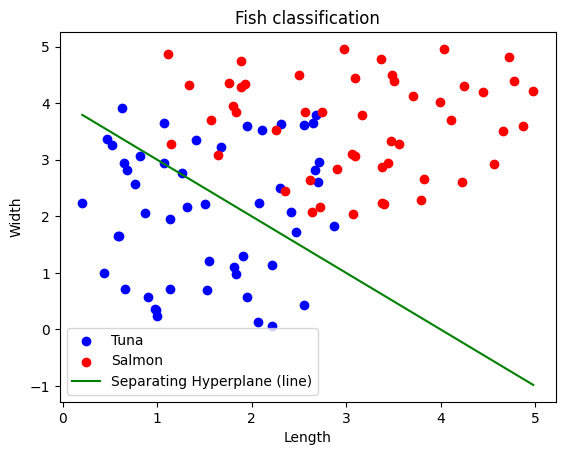

In [28]:
random_plane = [1, 1], -4
plot_model(random_plane)

New beset plane = ([-1.0, -1.0], -5.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-1.0, -1.0], -2.5) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-1.0, -0.99], -5.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-1.0, -0.99], -4.5) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-1.0, -0.99], -4.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-1.0, -0.99], -3.5) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-0.99, -0.98], -5.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-0.98, -0.97], -5.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-0.98, -0.97], -4.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-0.98, -0.97], -3.5) with a loss of <function loss at 0x7d8d34558550>
New beset plane = ([-0.97, -0.96], -5.0) with a loss of <function loss at 0x7d8d34558550>
New beset plane = 

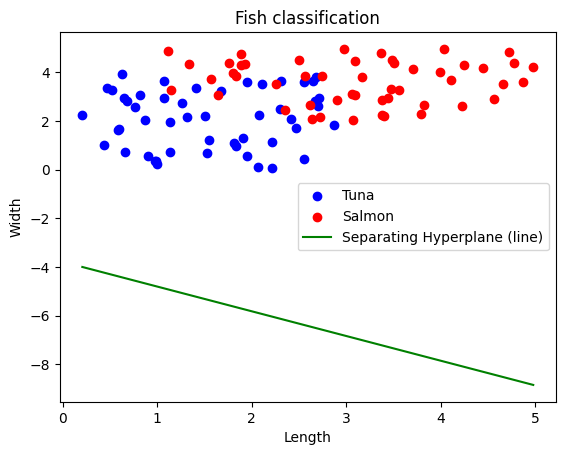

In [33]:
min_loss = float('inf')
best_plance=None
for w1 in np.arange(-1, 1, 0.01):
  for w2 in np.arange(-1, 1, 0.01):
    for w0 in np.arange(-5, 5, 0.5):
      plane = [w1, w2], w0
      l = loss(dataset, plane)
      if l < min_loss:
        min_loss = l
        best_plane = plane
        print(f'New beset plane = {plane} with a loss of {loss}')
plot_model(best_plane)